In [14]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np
import struct
from array import array
import os

# Pré-Processamento

## Leitura dos dados

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [16]:
x_train, y_train = x_train[:5000], y_train[:5000]
x_test, y_test = x_test[:2000], y_test[:2000]

In [17]:
x_train = x_train.reshape(-1,784).astype('float32') / 255.0 
x_test = x_test.reshape(-1,784).astype('float32') / 255.0


In [18]:
def one_hot(true_labels,num_classes): #
    labels = keras.utils.to_categorical(true_labels, num_classes)
    return labels

y_train_one_hot = one_hot(y_train, 10) #10 classes
y_test_one_hot = one_hot(y_test, 10)


# MPL

In [19]:
model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=(784,)))
model.add(Dense(units=40, activation='tanh'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax')) #10 classes

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 40)                440       
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                410       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 8810 (34.41 KB)
Trainable params: 8810 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(optimizer="sgd", loss='categorical_crossentropy',  metrics=['accuracy'])

model_fit = model.fit(x=x_train, y=y_train_one_hot, epochs=30, verbose=1, validation_data=(x_test, y_test_one_hot))

score = model.evaluate(x_test, y_test_one_hot, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30


157/157 [==============================] - 1s 3ms/step - loss: 2.2865 - accuracy: 0.1028 - val_loss: 2.2487 - val_accuracy: 0.1665
Epoch 2/30
157/157 [==============================] - 0s 2ms/step - loss: 2.2177 - accuracy: 0.1712 - val_loss: 2.1417 - val_accuracy: 0.2835
Epoch 3/30
157/157 [==============================] - 0s 2ms/step - loss: 2.0655 - accuracy: 0.2696 - val_loss: 1.9286 - val_accuracy: 0.3835
Epoch 4/30
157/157 [==============================] - 0s 2ms/step - loss: 1.8422 - accuracy: 0.3450 - val_loss: 1.6810 - val_accuracy: 0.4410
Epoch 5/30
157/157 [==============================] - 0s 2ms/step - loss: 1.5940 - accuracy: 0.4432 - val_loss: 1.4620 - val_accuracy: 0.5450
Epoch 6/30
157/157 [==============================] - 0s 2ms/step - loss: 1.3900 - accuracy: 0.5370 - val_loss: 1.2919 - val_accuracy: 0.5760
Epoch 7/30
157/157 [==============================] - 0s 2ms/step - loss: 1.2444 - accuracy: 0.5770 - val_loss: 1.1893 - val_accuracy: 0.6110
Epoch 8/30
157/15

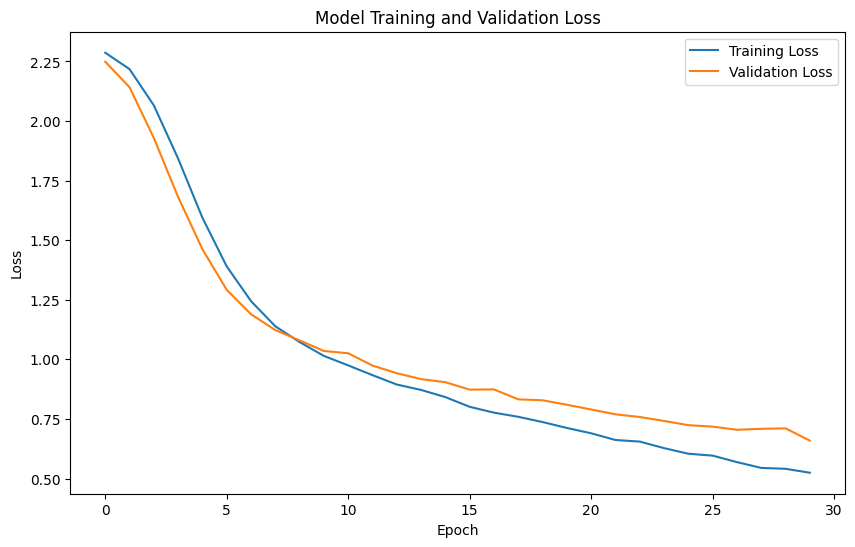

In [26]:
plt.figure(figsize=(10,6))
plt.plot(model_fit.history['loss'], label='Training Loss')
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

# Matriz de Confusão

63/63 [==============================] - 0s 857us/step


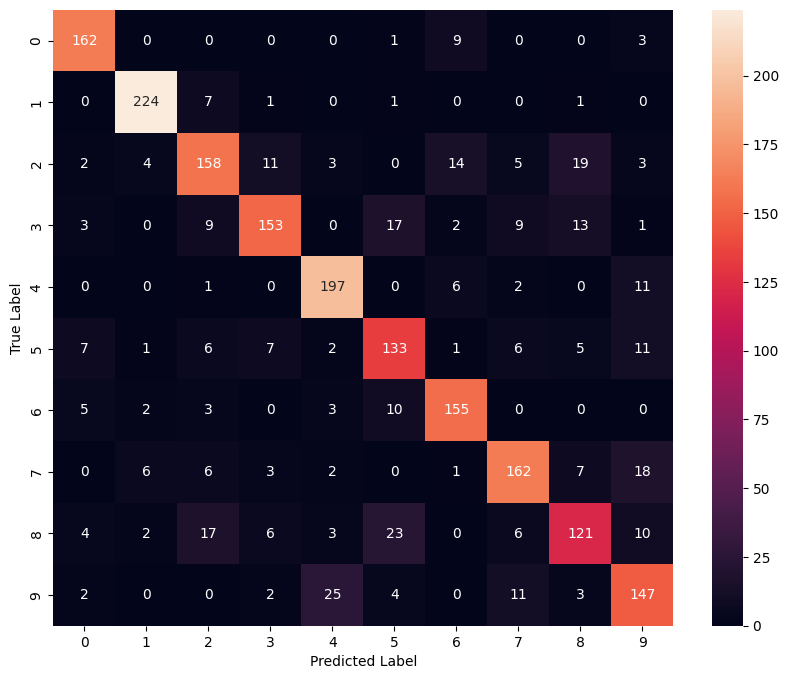

In [22]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true = np.argmax(y_test_one_hot, axis = 1) 
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# CNN

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from keras.datasets import mnist

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(7*7*64, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)  # 10 classes

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(x.size(0), -1)  #converte em vetor para a camada densa
        x = self.dropout(self.fc1(x))
        x = self.fc2(x)
        return x

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = x_train[:5000], y_train[:5000]
x_test, y_test = x_test[:2000], y_test[:2000]

#normalização
x_train = x_train.reshape(-1, 1, 28, 28).astype('float32') / 255
x_test = x_test.reshape(-1, 1, 28, 28).astype('float32') / 255

#converte pra tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_test = torch.from_numpy(x_test)
y_test = torch.from_numpy(y_test)

#separa em batches e cria os datasets de treino e teste
train_data = TensorDataset(x_train, y_train)
test_data = TensorDataset(x_test, y_test)

#cria os dataloaders de treino e teste
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

train_losses = []
val_losses = []

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

for epoch in range(30):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_loss = 0
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
        val_losses.append(val_loss / len(test_loader))

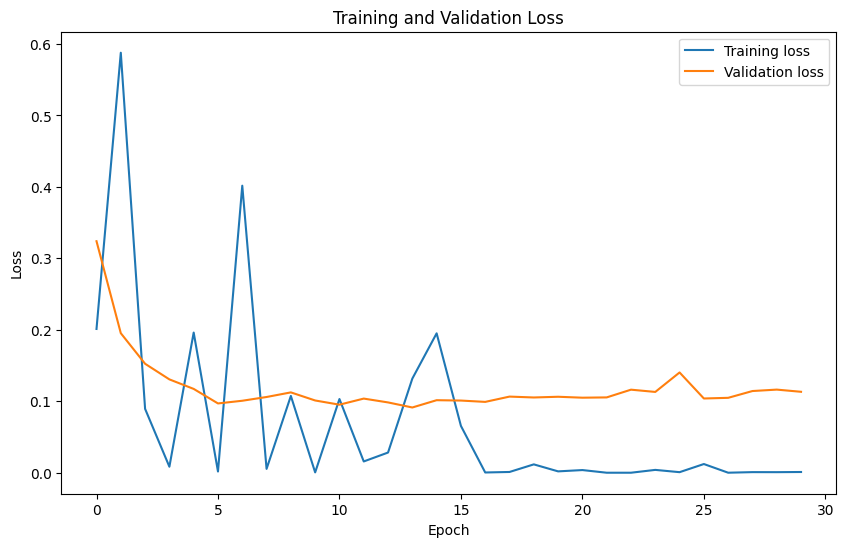

In [30]:
plt.figure(figsize=(10,6))
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

# Matriz de Confusão

Accuracy: 97.15 %


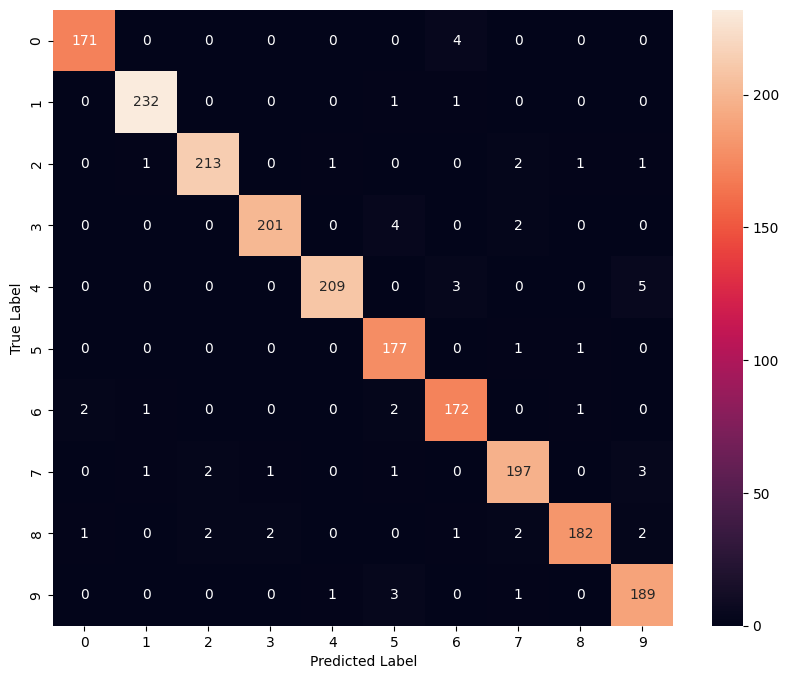

In [31]:
y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

print('Accuracy: {} %'.format(100 * correct / total))
confusion_mtx = confusion_matrix(y_true, y_pred) 


plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()